In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from collections import defaultdict
from termcolor import colored, cprint
from PIL import Image
import os
import pickle
import json
import cv2

In [2]:
# create giant dictionary for all data
data_dir = 'mmhs150k/'
tweet_dict = json.load(open(data_dir + 'MMHS150K_GT.json', 'r'))
print('Length of Tweet Dictionary:', len(tweet_dict))

data_dict = dict()
for k, v in tweet_dict.items(): data_dict[k] = {'tweet_text': v['tweet_text'], 
                                                'labels': v['labels']}
    
label_to_str = {0: 'NotHate', 1: 'Racist', 2: 'Sexist', 3: 'Homophobe', 4: 'Religion', 5: 'OtherHate'}

Length of Tweet Dictionary: 149823


Number of Positive Votes: 0 Tweet Count: 57931
Number of Positive Votes: 1 Tweet Count: 54923
Number of Positive Votes: 2 Tweet Count: 28395
Number of Positive Votes: 3 Tweet Count: 8574


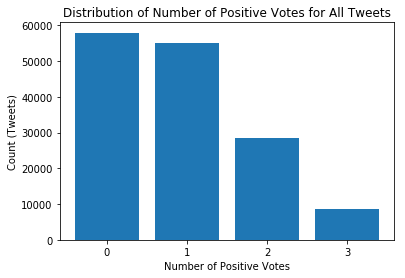

In [3]:
# plot disagreements (positive vs negative)
vote_dict = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    vote_dict[sum(votes)] += 1
    
for k, v in vote_dict.items():
    print('Number of Positive Votes:', k, 'Tweet Count:', v)

labels, counts = zip(*vote_dict.items())
plt.bar([str(x) for x in labels],counts)
plt.ylabel('Count (Tweets)')
plt.xlabel('Number of Positive Votes')
plt.title('Distribution of Number of Positive Votes for All Tweets')
plt.show()

Number of Positive Votes: 0.00 Tweet Count: 57931
Number of Positive Votes: 1.00 Tweet Count: 8577
Number of Positive Votes: 0.50 Tweet Count: 15
Number of Positive Votes: 0.33 Tweet Count: 54897
Number of Positive Votes: 0.20 Tweet Count: 2
Number of Positive Votes: 0.67 Tweet Count: 28388
Number of Positive Votes: 0.25 Tweet Count: 13


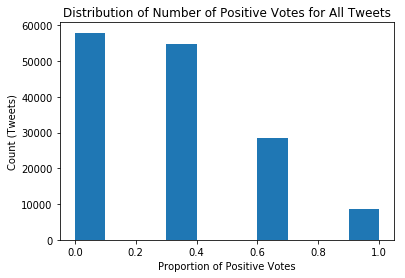

In [4]:
# plot disagreements (positive vs negative)
vote_dict = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    vote_dict[sum(votes)/len(votes)] += 1
    
for k, v in vote_dict.items(): print('Number of Positive Votes:', "{:.2f}".format(k), 'Tweet Count:', v)

labels, counts = zip(*vote_dict.items())
plt.hist(labels, weights=counts)
plt.ylabel('Count (Tweets)')
plt.xlabel('Proportion of Positive Votes')
plt.title('Distribution of Number of Positive Votes for All Tweets')
plt.show()

Cases with more or less than 3 votes and at least 1 positive vote: 33
Cases with more or less than 3 votes: 74 

Labels: ['NotHate', 'NotHate', 'Racist'] Count: 30324
Labels: ['NotHate', 'NotHate', 'OtherHate'] Count: 10359
Labels: ['NotHate', 'Racist', 'Racist'] Count: 8898
Labels: ['NotHate', 'NotHate', 'Sexist'] Count: 8877
Labels: ['NotHate', 'NotHate', 'Homophobe'] Count: 4235
Labels: ['NotHate', 'OtherHate', 'OtherHate'] Count: 3797
Labels: ['NotHate', 'Racist', 'OtherHate'] Count: 3140
Labels: ['NotHate', 'Sexist', 'Sexist'] Count: 2270
Labels: ['NotHate', 'Homophobe', 'Homophobe'] Count: 2190
Labels: ['NotHate', 'Sexist', 'OtherHate'] Count: 2068


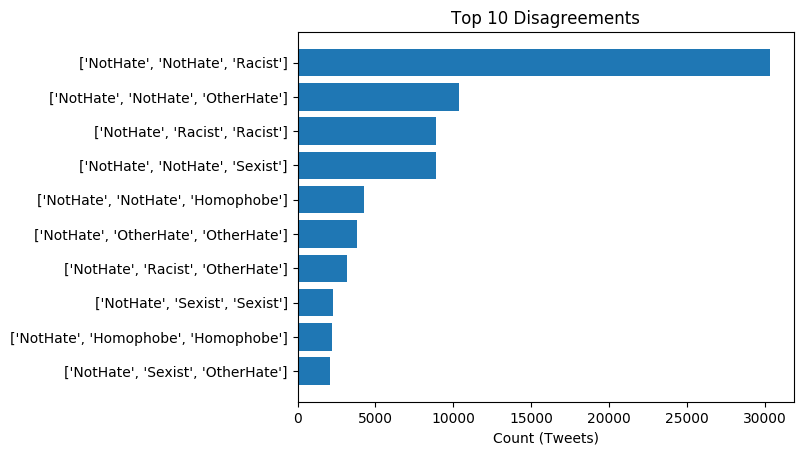

In [5]:
# analyze heterogeneity within positive examples
granular_votes = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    if sum(votes) > 0: granular_votes[tuple(sorted(v['labels']))] += 1


print('Cases with more or less than 3 votes and at least 1 positive vote:', sum([count for label, count in granular_votes.items() if len(label) != 3]))
print('Cases with more or less than 3 votes:', len([(k, v) for (k, v) in data_dict.items() if len(v['labels']) != 3]), '\n')

plt.rcdefaults()
fig, ax = plt.subplots()

top10 = sorted(granular_votes.items(), key=lambda x: -x[1])[:10]
labels, counts = zip(*top10)
labels = [str([label_to_str[v] for v in triplet]) for triplet in labels]

for label, count in zip(labels, counts): print('Labels:', label, 'Count:', count)

y_pos = np.arange(10)
ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count (Tweets)')
ax.set_title('Top 10 Disagreements')
plt.show()

Tweet body:
	Thnks ma nigga!!!!!! #PS4share https://t.co/DH30XBVlRW
Image text:
	None


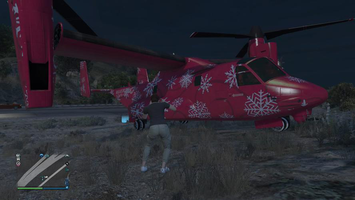


Tweet body:
	everything your nigga want im like a walking wishlist 🤩 https://t.co/BxMsbgP0st
Image text:
	None


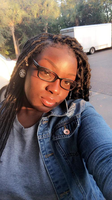


Tweet body:
	Where is she? Has..has she just run away..? (Probably. Useless twat.) #brexit @theresa_may https://t.co/trRzDQ1NAz
Image text:
	LIVE Latest as Theresa May expected to make statement UK POLITICS 


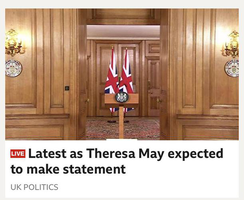


Tweet body:
	Me, A broke nigga, tweeting this. https://t.co/SiV5ZOmTDa
Image text:
	None


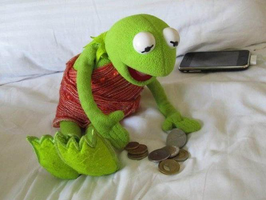


Tweet body:
	Anyone wanna be a nigga friend ? https://t.co/2dPF9k8Odz
Image text:
	CLE 93GS 114 4th 3:05 4GS LEAD O: 0 BONUS та з BONUS 


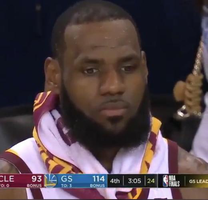


Tweet body:
	@MediaKingATL You still on you house nigga shit i see. https://t.co/elBZGfbjUA
Image text:
	Hey little troublemaker 


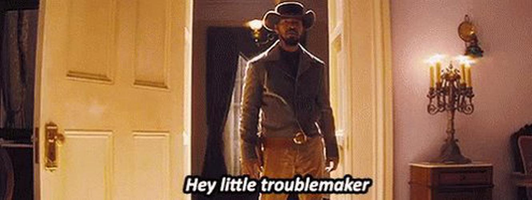


Tweet body:
	17. we love a kinky redneck walmart employee https://t.co/Mk1YEb9taP
Image text:
	None


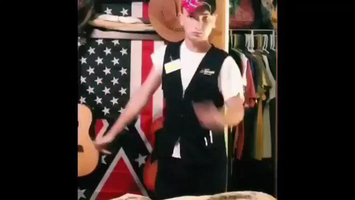


Tweet body:
	@lambology_ @KwesiArthur_ @sarkodie @AmgMedikal @r2bees  Nigga retweet let’s promote our boy https://t.co/6gsxNGotQy
Image text:
	None


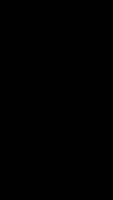


Tweet body:
	@Sbb_Jo That nigga don’t got no pull on the East Coast! This ain’t Texas or Detroit! 😩😩😩👉🏾FOH ! https://t.co/Ms0uACDWYp
Image text:
	None


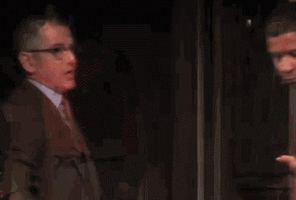


Tweet body:
	47. I called and texted that nigga he don’t reply the whole weekend.. I left that nigga MULTIPLE VOICEMAILS https://t.co/TfCCCsQr4T
Image text:
	None


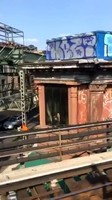


Tweet body:
	i am trash for white men and wHAT ABOUT IT https://t.co/Thua28QyXc
Image text:
	Facebook Watch 


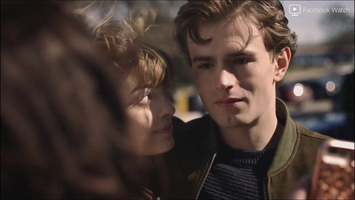


Tweet body:
	Las Vegas strip middle of the street pic ... nigga been wanting one of these for a minute https://t.co/tpSAqhq0FS
Image text:
	None


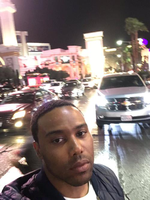


Tweet body:
	dyke squad #LGBTQsquad https://t.co/f7nqQw5ZRS
Image text:
	None


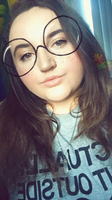


Tweet body:
	This nigga was sooooooo fine my ass slid in the DMs and slid back out 💀💀💀💀💀💀💀  My heart is still racing tbh https://t.co/s119nxFI3P
Image text:
	WHAT DID I JUST DO? 


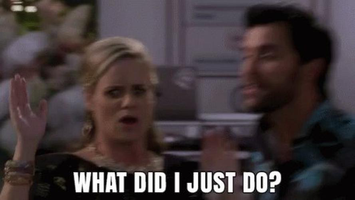


Tweet body:
	Respect The Nigger They Are Gossiping About Not The Nigger Running His Big Mouth👌🏻👌🏻 https://t.co/r8s7Vbx04P
Image text:
	None


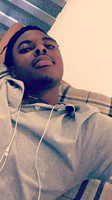


Tweet body:
	Spicy Tuna Deviled Eggs  ➡ https://t.co/nUINob3Tfl  #keto #lowcarb #ketodietapp https://t.co/z3j8iiWTjj
Image text:
	None


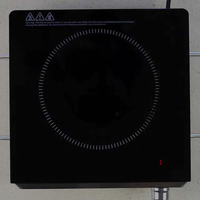


Tweet body:
	@Derameth @realDonaldTrump @BreitbartNews #BuildTheWall Don't care at all  ,  #OverThatWall in no time at all https://t.co/ARshWOCyOf
Image text:
	None


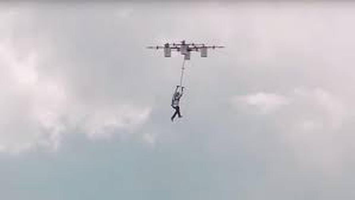


Tweet body:
	*walks into barbershop*  Random nigga #1: this galaxy kinda nice  Random nigga #2: MAN I LOVE ANDROID   Me: https://t.co/vPThJTcidJ
Image text:
	None


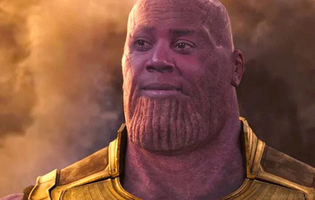


Tweet body:
	Redneck party time. https://t.co/6JSdC6ke0U
Image text:
	None


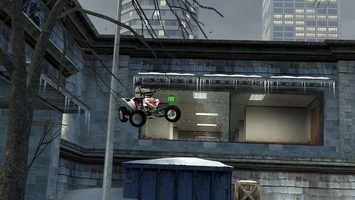


Tweet body:
	@lildiccgang nigga what in tarnation https://t.co/cIKo3T0XQe
Image text:
	gistcítiafrica.blogspot.com "くロ Gistcity Africa Media: Wife Cuts Of Husband's Penis And Uses It... 圖片可能受版權保護。瞭解詳情 相關圖片 Wife Cuts Off Hubby's Peen,C.. gistmania.com 搜尋 最近 探索 更多 


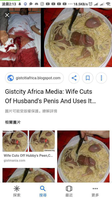

In [6]:
# view examples of [not hate, not hate, racist]
from PIL import Image
for k, v in [(k, v) for (k, v) in data_dict.items() if sorted(v['labels']) == [0,0,1]][:20]:
    
    # print tweet body
    cprint('Tweet body:', 'red')
    cprint('\t' + v['tweet_text'])
    
    # print image text
    cprint('Image text:', 'red')
    try:
        text = json.load(open(data_dir + 'img_txt/' + k + '.json', 'r'))
        print('\t' + text['img_text'])
    except Exception as e: print('\tNone')
    
    # show image
    height = 200
    im = Image.open(data_dir + 'img_resized/' + k + '.jpg')
    im = im.resize((int(height * im.size[0]/float(im.size[1])), height), Image.ANTIALIAS)
    display(im)
    print()

Tweet body:
	Thnks ma nigga!!!!!! #PS4share https://t.co/DH30XBVlRW
	Tweet body AA score: 0.3668769239912803
	Tweet body WA score: 0.024706453285995078
Image text:
	None


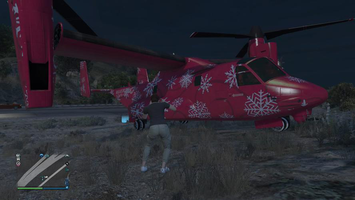


Tweet body:
	everything your nigga want im like a walking wishlist 🤩 https://t.co/BxMsbgP0st
	Tweet body AA score: 0.33102464032937234
	Tweet body WA score: 0.2051121754687432
Image text:
	None


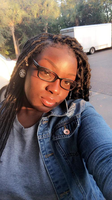


Tweet body:
	Where is she? Has..has she just run away..? (Probably. Useless twat.) #brexit @theresa_may https://t.co/trRzDQ1NAz
	Tweet body AA score: 0.28639696084657046
	Tweet body WA score: 0.3874485788590199
Image text:
	LIVE Latest as Theresa May expected to make statement UK POLITICS 
	Image text AA score: 0.07950857560432179
	Image text WA score: 0.8070539932516663


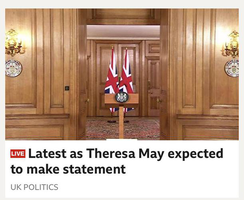


Tweet body:
	Me, A broke nigga, tweeting this. https://t.co/SiV5ZOmTDa
	Tweet body AA score: 0.4396791250678751
	Tweet body WA score: 0.2621191305839615
Image text:
	None


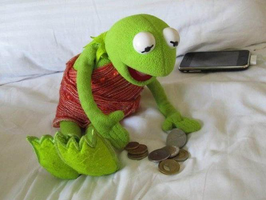


Tweet body:
	Anyone wanna be a nigga friend ? https://t.co/2dPF9k8Odz
	Tweet body AA score: 0.3418727530645844
	Tweet body WA score: 0.3022883359463778
Image text:
	CLE 93GS 114 4th 3:05 4GS LEAD O: 0 BONUS та з BONUS 
	Image text AA score: 0.02508524006467746
	Image text WA score: 0.04308274981151006


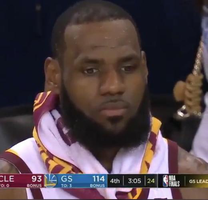


Tweet body:
	@MediaKingATL You still on you house nigga shit i see. https://t.co/elBZGfbjUA
	Tweet body AA score: 0.5478002008739542
	Tweet body WA score: 0.17292214970876915
Image text:
	Hey little troublemaker 
	Image text AA score: 0.0842113969354474
	Image text WA score: 0.3684989535257817


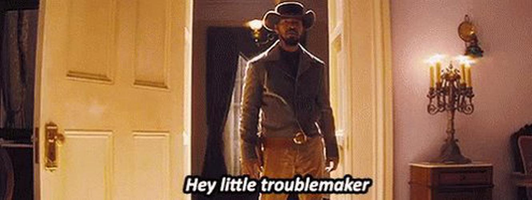


Tweet body:
	17. we love a kinky redneck walmart employee https://t.co/Mk1YEb9taP
	Tweet body AA score: 0.0967911516357503
	Tweet body WA score: 0.6155949073958357
Image text:
	None


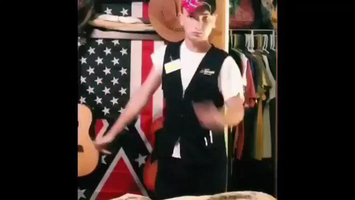


Tweet body:
	@lambology_ @KwesiArthur_ @sarkodie @AmgMedikal @r2bees  Nigga retweet let’s promote our boy https://t.co/6gsxNGotQy
	Tweet body AA score: 0.4385975934252075
	Tweet body WA score: 0.22295180383326915
Image text:
	None


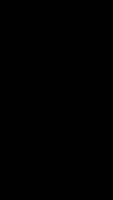


Tweet body:
	@Sbb_Jo That nigga don’t got no pull on the East Coast! This ain’t Texas or Detroit! 😩😩😩👉🏾FOH ! https://t.co/Ms0uACDWYp
	Tweet body AA score: 0.5749576066690775
	Tweet body WA score: 0.1510432823260611
Image text:
	None


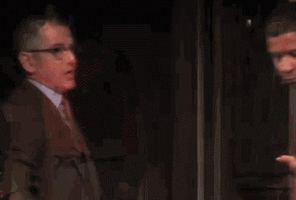


Tweet body:
	47. I called and texted that nigga he don’t reply the whole weekend.. I left that nigga MULTIPLE VOICEMAILS https://t.co/TfCCCsQr4T
	Tweet body AA score: 0.41088760802286606
	Tweet body WA score: 0.29525557605698816
Image text:
	None


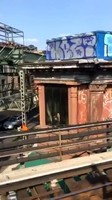


Tweet body:
	i am trash for white men and wHAT ABOUT IT https://t.co/Thua28QyXc
	Tweet body AA score: 0.2419458432921453
	Tweet body WA score: 0.47485208602431844
Image text:
	Facebook Watch 
	Image text AA score: 0.20916324364005595
	Image text WA score: 0.4018494609109391


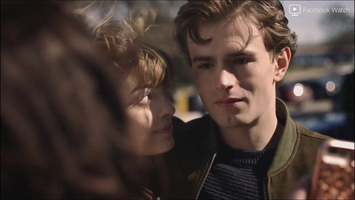


Tweet body:
	Las Vegas strip middle of the street pic ... nigga been wanting one of these for a minute https://t.co/tpSAqhq0FS
	Tweet body AA score: 0.3495416280350341
	Tweet body WA score: 0.29697466338782774
Image text:
	None


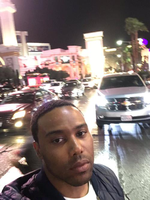


Tweet body:
	dyke squad #LGBTQsquad https://t.co/f7nqQw5ZRS
	Tweet body AA score: 0.49929615202808975
	Tweet body WA score: 0.2128923829749571
Image text:
	None


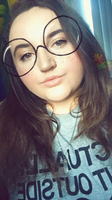


Tweet body:
	This nigga was sooooooo fine my ass slid in the DMs and slid back out 💀💀💀💀💀💀💀  My heart is still racing tbh https://t.co/s119nxFI3P
	Tweet body AA score: 0.4615539915956473
	Tweet body WA score: 0.22507909505038212
Image text:
	WHAT DID I JUST DO? 
	Image text AA score: 0.23379655290452714
	Image text WA score: 0.36224767090898075


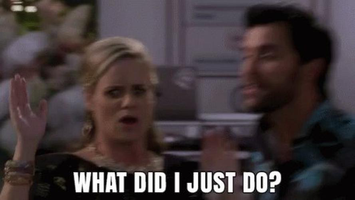


Tweet body:
	Respect The Nigger They Are Gossiping About Not The Nigger Running His Big Mouth👌🏻👌🏻 https://t.co/r8s7Vbx04P
	Tweet body AA score: 0.4081629379558644
	Tweet body WA score: 0.3059006273743467
Image text:
	None


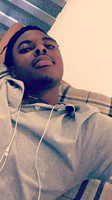


Tweet body:
	Spicy Tuna Deviled Eggs  ➡ https://t.co/nUINob3Tfl  #keto #lowcarb #ketodietapp https://t.co/z3j8iiWTjj
	Tweet body AA score: 0.1445200730826759
	Tweet body WA score: 0.19045069618390006
Image text:
	None


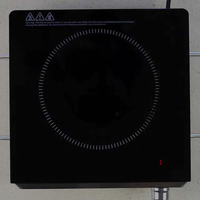


Tweet body:
	@Derameth @realDonaldTrump @BreitbartNews #BuildTheWall Don't care at all  ,  #OverThatWall in no time at all https://t.co/ARshWOCyOf
	Tweet body AA score: 0.22558707539749617
	Tweet body WA score: 0.4056548554483559
Image text:
	None


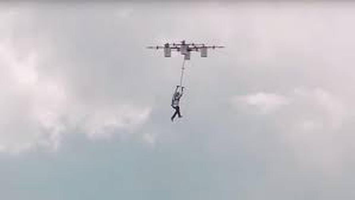


Tweet body:
	*walks into barbershop*  Random nigga #1: this galaxy kinda nice  Random nigga #2: MAN I LOVE ANDROID   Me: https://t.co/vPThJTcidJ
	Tweet body AA score: 0.42313509998192017
	Tweet body WA score: 0.20727776878864565
Image text:
	None


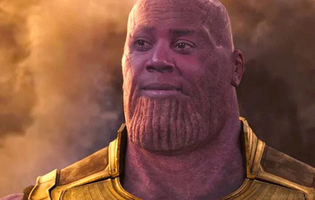


Tweet body:
	Redneck party time. https://t.co/6JSdC6ke0U
	Tweet body AA score: 0.006541367559634279
	Tweet body WA score: 0.9236040151108439
Image text:
	None


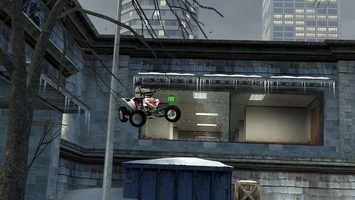


Tweet body:
	@lildiccgang nigga what in tarnation https://t.co/cIKo3T0XQe
	Tweet body AA score: 0.4928605312856541
	Tweet body WA score: 0.19897824014928275
Image text:
	gistcítiafrica.blogspot.com "くロ Gistcity Africa Media: Wife Cuts Of Husband's Penis And Uses It... 圖片可能受版權保護。瞭解詳情 相關圖片 Wife Cuts Off Hubby's Peen,C.. gistmania.com 搜尋 最近 探索 更多 
	Image text AA score: 0.19155115835797112
	Image text WA score: 0.5012755781202809


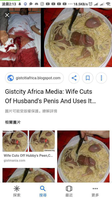

In [14]:
# view examples of [not hate, not hate, racist], but with twitteraae scores as well
from twitteraae.code import predict
predict.load_model()

for k, v in [(k, v) for (k, v) in data_dict.items() if sorted(v['labels']) == [0,0,1]][:20]:
    
    # print tweet body
    cprint('Tweet body:', 'red')
    cprint('\t' + v['tweet_text'])
    aae_scores = predict.predict(v['tweet_text'].split())
    cprint('\tTweet body AA score: ' + str(aae_scores[0]), 'green')
    cprint('\tTweet body WA score: ' + str(aae_scores[3]), 'green')

    
    # print image text
    cprint('Image text:', 'red')
    try:
        text = json.load(open(data_dir + 'img_txt/' + k + '.json', 'r'))
        print('\t' + text['img_text'])
        aae_scores = predict.predict(text['img_text'].split())
        cprint('\tImage text AA score: ' + str(aae_scores[0]), 'green')
        cprint('\tImage text WA score: ' + str(aae_scores[3]), 'green')
    except Exception as e: print('\tNone')
    
    # show image
    height = 200
    im = Image.open(data_dir + 'img_resized/' + k + '.jpg')
    im = im.resize((int(height * im.size[0]/float(im.size[1])), height), Image.ANTIALIAS)
    display(im)
    print()

Tweet ID: 1045797405147451392
THE FRAT RELA DABE, WY DONT YOU PUT WERE FRIENDS DONN THOSE SCALES AND HAVE ANOTHER DRINK! OF BRETT KAVANAUGH. TOGA! UDICIAR 


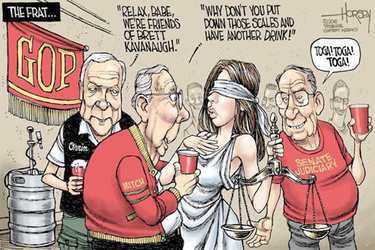


Tweet ID: 1044962210462748673
THE TRIAL O OFFICER JASON VAN DYKE 


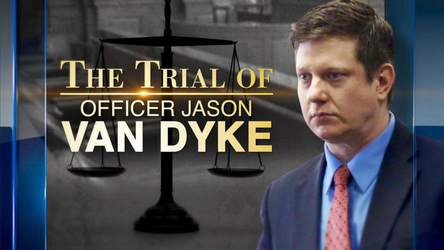


Tweet ID: 1108245165049679872
SILENCE 


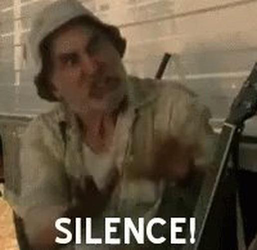


Tweet ID: 1114857626037305345
С НАТ 


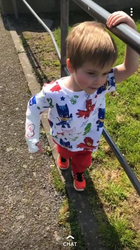


Tweet ID: 1037436439917719563
WHY NOT BOTH 


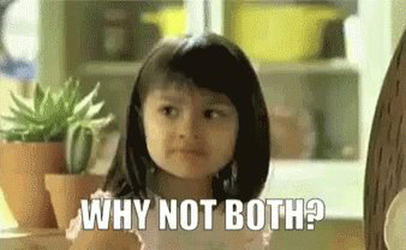


Tweet ID: 1115626641533755392
DOTA 2 STATS BETS ESPORTS PROFILES 


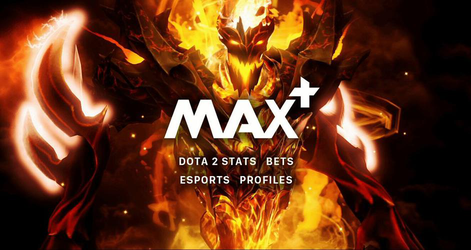


Tweet ID: 1057066706470879232
CENTRAL AMERICAN CARAVANS GULF OF MEXICO MEXICO ク. GUATEMALA CITY GUATEMALA EL SALVADOR NILTEPEC CIUDAD HIDALGO HONDURAS SAN SALVADOR LOU DOBBS FOA -TONIGHT BUSINESS 


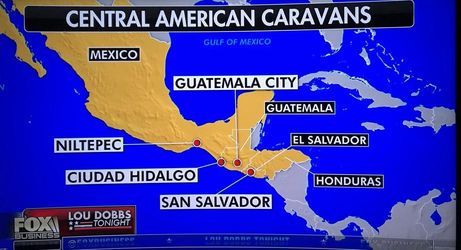


Tweet ID: 1108694661302906880
obrambo 


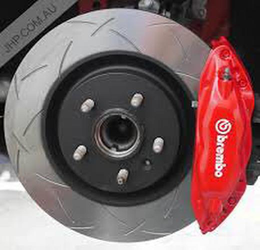


Tweet ID: 1056957127036715012
Bike Shed 


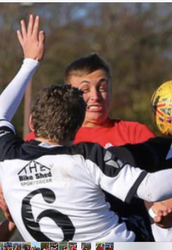


Tweet ID: 1115100537442185216
Haiti's first president Jean-Jacques Dessalines called Polish people "the White Negroes of Europe", which was then regarded a great honour, as it meant brotherhood between Poles and Haitians. Us Poles have the infinite N word pass making us the most powerful white people 


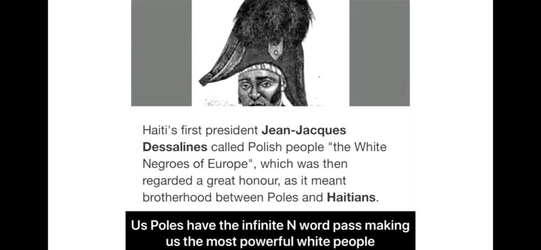


Tweet ID: 1057623079659233280
Dumbrellas 


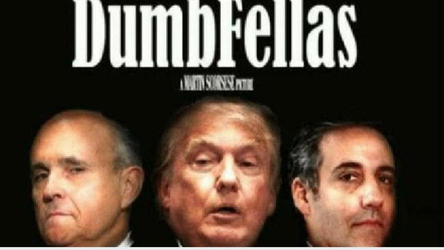


Tweet ID: 1109605949608787970
#EmpreFinale 


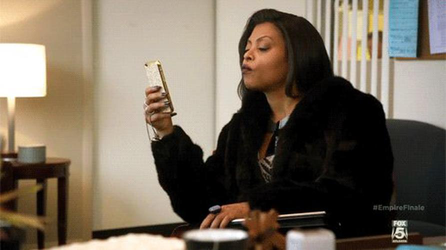


Tweet ID: 1037310215547498496
YOU WENT FULL RETARD NEVER GO FULL RETARD TROLL 


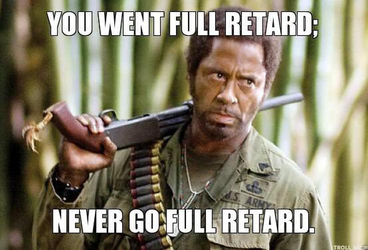


Tweet ID: 1114528185297846272
15:58 2:03 0:42 İNFOMERCİALS İNTERLuDE (feat. Sipho the Gift-İNDİGO 4b) 


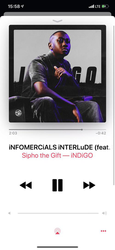


Tweet ID: 1106824295387447297
KAKT 


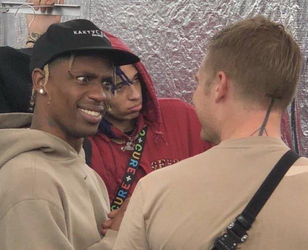


Tweet ID: 1042561210955194373
Whatever you say Liberal 


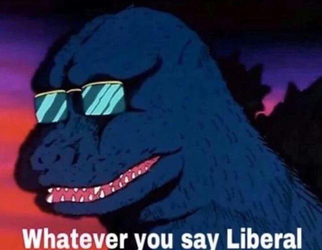


Tweet ID: 1037262827252137984
Home si iDE2197 The eartha,hungry theots ane cem learing, The Its heart 


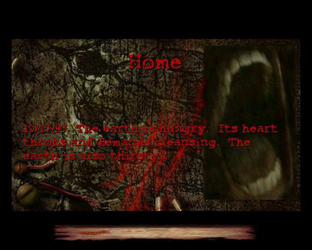


Tweet ID: 1113624575043088385
This is bad, luv 


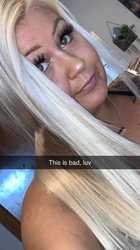


Tweet ID: 1055934636092780544
MARCHAND UPEN DAIL 


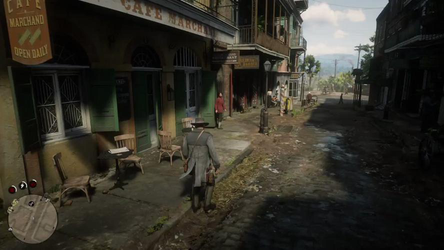


Tweet ID: 1058938335417131008
REALITYKIN 


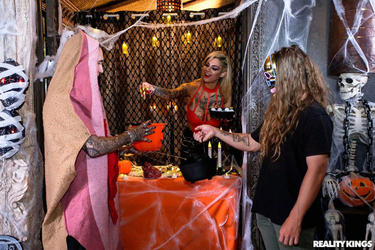

In [15]:
# check OCR accuracy
for filename in os.listdir(data_dir + 'img_txt')[:20]:
    cprint('Tweet ID: ' + filename.split('.')[0], 'red')
    img_txt = json.load(open(data_dir + 'img_txt/' + filename, 'r'))
    print(img_txt['img_text'])
    
    height = 250
    im = Image.open(data_dir + 'img_resized/' + filename.split('.')[0] + '.jpg')
    im = im.resize((int(height * im.size[0]/float(im.size[1])), height), Image.ANTIALIAS)
    display(im)
    print()